<a href="https://colab.research.google.com/github/EddyGiusepe/Understanding_Convolutional_Neural_Networks_CNN/blob/main/Small_Image_Classification_Using_CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center">Classificação de imagens pequenas usando rede neural convolucional (CNN)</h2>


Data Science.: Dr.Eddy Giusepe Chirinos Isidro



Neste script, vamos classificar o conjunto de dados [cifar10](https://www.cs.toronto.edu/~kriz/cifar.html) de imagens pequenas dos conjuntos de Dados `Tensorflow keras`. Há um total de $10$ classes como mostrado abaixo. Usaremos a `CNN` para classificação.

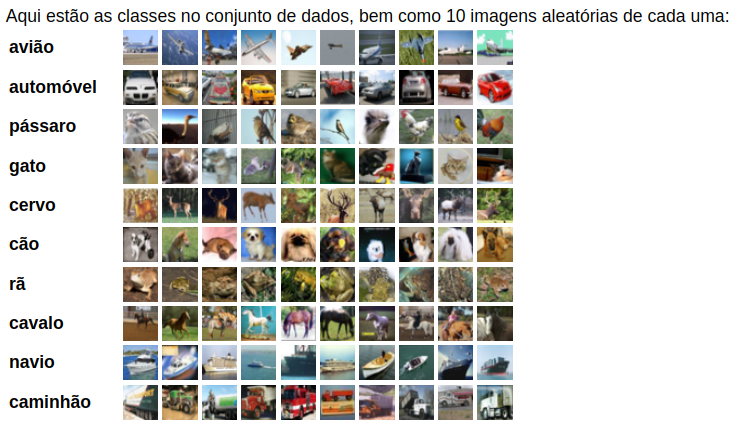

Link de estudo:

* [Classificação de Imagens usando o Dataset CIFAR10](https://www.youtube.com/watch?v=7HPwo4wnJeA)

Ver também:

* [Handwritten digits classification using neural network](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/1_digits_recognition/digits_recognition_neural_network.ipynb)


* [CODE BASICS](https://github.com/codebasics/deep-learning-keras-tf-tutorial)

In [1]:
# Nossas Bibliotecas

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregamos nosso Dataset

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [3]:
# 50000 Imagens para treinamento
X_train.shape

(50000, 32, 32, 3)

In [4]:
# 10000 Imagens para teste
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

# Podemos ver dois colchetes ... ou seja é de duas dimensões

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

`y_train` é uma matriz de 2D, pois nossa classificação com matriz 1D é boa o suficiente. então vamos converter isso agora para array 1D.

In [7]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [8]:
y_train[:5]

# Apenas um colchete ... ou seja de uma dimensão

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test.shape

(10000, 1)

In [10]:
# também para nossos Dados de teste

y_test = y_test.reshape(-1,)
y_test.shape

(10000,)

In [11]:
# Nossas classes

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
# Por exemplo: reparemos nos índices e nos resultados

y_train[0], y_train[1], y_train[2], y_train[3]

(6, 9, 9, 4)

Vamos plotar algumas imagens para ver o que temos como Dados:

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

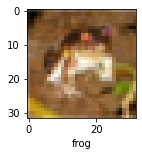

In [14]:
plot_sample(X_train, y_train, 0)

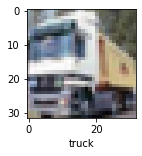

In [15]:
plot_sample(X_train, y_train, 1)

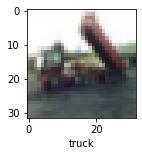

In [16]:
plot_sample(X_train, y_train, 2)

Normalizaremos as imagens para um número de $0$ a $1$. A imagem tem $3$ canais (`RGB`) e cada valor no canal pode variar de $0$ a $255$. Portanto, para normalizar no intervalo $0$ $⟹$ $1$, precisamos dividir por $255$.


In [17]:
# Normalizamos nossos Dados EM X

X_train = X_train / 255.0
X_test = X_test / 255.0

# Construímos uma Rede Neural Artificial Simples para Classificação de Imagens

In [18]:
RN_artificial = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])



In [27]:
RN_artificial.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinamos
#RN_artificial.fit(X_train, y_train, epochs=4, batch_size=4, verbose=1, validation_split=0.25)
RN_artificial.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3180 - accuracy: 0.5332
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2917 - accuracy: 0.5424
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2669 - accuracy: 0.5528
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2432 - accuracy: 0.5600
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2196 - accuracy: 0.5698


In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np


y_pred = RN_artificial.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]


print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.53      0.59      1000
           1       0.72      0.57      0.64      1000
           2       0.48      0.32      0.38      1000
           3       0.38      0.34      0.36      1000
           4       0.45      0.47      0.46      1000
           5       0.49      0.33      0.39      1000
           6       0.42      0.78      0.55      1000
           7       0.64      0.54      0.58      1000
           8       0.71      0.61      0.66      1000
           9       0.47      0.74      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.52     10000
weighted avg       0.54      0.52      0.52     10000



# Agora construímos uma Rede Neural Convolucional para treinar nossas imagens

In [29]:
model_CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
model_CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Treinamos
model_CNN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.4628 - accuracy: 0.4761
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0969 - accuracy: 0.6171
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9650 - accuracy: 0.6654
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8830 - accuracy: 0.6921
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8168 - accuracy: 0.7165


<font color="orange">Com o `model_CNN`, no final de 5 épocas, a accuracy estava em torno de 70%, o que é uma melhoria significativa em relação à `RN_artificial`. As `CNNs` são os melhores para **classificação de imagens** e oferecem excelente accuracy. Além disso, a computação é muito menor em comparação com a Redes Neurais Artificiais (RNA) simples, pois o `maxpooling` reduz as dimensões da imagem enquanto ainda preserva as características (features).</font>

In [32]:
model_CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9245 - accuracy: 0.6870


[0.9245215058326721, 0.6869999766349792]

In [39]:
y_pred = model_CNN.predict(X_test)

y_pred[:10]

array([[3.0855356e-02, 1.1917674e-03, 3.6519643e-02, 5.0429702e-01,
        2.8581489e-03, 1.8801969e-01, 1.1227399e-01, 3.4724060e-03,
        1.1549512e-01, 5.0168578e-03],
       [5.0627994e-03, 2.5265424e-02, 1.6931290e-06, 2.4703816e-06,
        6.7117321e-07, 9.0863102e-07, 6.1499200e-08, 1.7963815e-07,
        9.6871817e-01, 9.4759942e-04],
       [6.0517818e-02, 9.3056746e-02, 1.6002009e-03, 4.9846536e-03,
        8.9515472e-04, 1.8755011e-03, 9.5283415e-04, 3.5684339e-03,
        8.0412340e-01, 2.8425297e-02],
       [7.2704577e-01, 3.0556059e-02, 9.9848984e-03, 1.1981899e-03,
        9.8637203e-03, 1.9514469e-04, 9.8706316e-03, 7.3424912e-05,
        2.0980233e-01, 1.4098927e-03],
       [1.2837282e-05, 3.8964641e-05, 1.6304402e-02, 2.2801066e-02,
        2.3356703e-01, 1.9557015e-03, 7.2518659e-01, 2.3041972e-05,
        1.0019922e-04, 1.0214501e-05],
       [1.8433050e-03, 3.6072673e-04, 3.7042491e-02, 7.6133564e-02,
        5.7019251e-03, 4.0386595e-02, 8.3066595e-01, 1.53

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [42]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

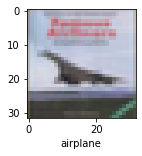

In [43]:
plot_sample(X_test, y_test,3)

In [44]:

classes[y_classes[3]]

'airplane'